In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Preparation

In [50]:
df = pd.read_csv('stocks_log_unscaled.csv', index_col=0)
df['stock_dummy'] = df['ticker'].astype('category').cat.codes
df = df.rename(columns={'daily_volatility': 'daily_spread'})

df.head()

,date,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_spread,log_return,log_attention,stock_dummy
0,2014-01-02,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15,0.30,-0.006705,1.147402,20
1,2014-01-03,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54,0.62,-0.006751,0.431782,20
2,2014-01-06,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24,0.78,-0.021359,0.806476,20
3,2014-01-07,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19,0.28,0.007720,0.173953,20
4,2014-01-08,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68,0.56,-0.018013,0.518794,20


In [51]:
anomalies_df = pd.read_csv('anomalies_dummies.csv', index_col = 0)
anomalies_df = anomalies_df.rename(columns={'volatility': 'daily_spread'})
anomalies_df['stock_dummy'] = anomalies_df['ticker'].astype('category').cat.codes
anomalies_df['log_return'] = df['log_return']
anomalies_df['log_name_price_attention'] = df['log_attention']
anomalies_df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release,stock_dummy,log_return,log_name_price_attention
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,-0.998750,...,NaN,NaN,NaN,2014-01-02,1,0,0,20,-0.006705,1.147402
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,-1.001888,...,NaN,NaN,NaN,2014-01-03,1,0,0,20,-0.006751,0.431782
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,-1.005672,...,NaN,NaN,NaN,2014-01-06,1,1,0,20,-0.021359,0.806476
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,-1.007056,...,NaN,NaN,NaN,2014-01-07,1,0,0,20,0.007720,0.173953
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,-1.011579,...,NaN,NaN,NaN,2014-01-08,1,0,0,20,-0.018013,0.518794


In [52]:
df_scaled = pd.read_csv('stocks_log_norm_scaled.csv', index_col=0)
df_scaled = df_scaled.rename(columns={'volatility': 'daily_spread'})
df_scaled['jan_dummy'] = anomalies_df['jan_dummy']
df_scaled['annual_rep_release'] = anomalies_df['annual_rep_release']
df_scaled['monday_dummy'] = anomalies_df['monday_dummy']

df_scaled.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,pct_return,name_price_attention,daily_spread,industry,stock_dummy,log_return,log_name_price_attention,jan_dummy,annual_rep_release,monday_dummy
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,-0.998750,...,-0.419196,-0.712226,-0.494860,Technology,20,-0.006705,1.423108,1,0,0
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,-1.001888,...,-0.421781,-0.816796,-0.438358,Technology,20,-0.006751,0.932164,1,0,0
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,-1.005672,...,-1.249333,-0.771331,-0.410107,Technology,20,-0.021359,1.175573,1,0,1
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,-1.007056,...,0.409965,-0.839528,-0.498392,Technology,20,0.007720,0.783902,1,0,0
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,-1.011579,...,-1.060843,-0.807703,-0.448952,Technology,20,-0.018013,0.985817,1,0,0


In [53]:
df.describe()

/usr/local/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_spread,log_return,log_attention,stock_dummy
count,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,7.044800e+04,70448.000000
mean,145.495397,1.157947e+07,0.000614,147.012658,143.910029,145.475873,145.461344,2.577778e+08,0.061384,14.115716,3.102629,0.000462,-inf,13.500000
std,108.420623,1.685646e+07,0.017407,110.429143,106.300702,108.378896,108.347582,3.664491e+08,1.740688,15.396513,5.663514,0.017416,NaN,8.077805
min,21.349900,3.053580e+05,-0.238484,21.620000,21.270000,21.340000,21.445000,1.715150e+07,-23.848400,0.000000,0.090000,-0.272444,-inf,0.000000
25%,80.590000,3.327002e+06,-0.006783,81.240000,80.000000,80.580000,80.613750,1.069959e+08,-0.678300,0.000000,1.040000,-0.006806,NaN,6.750000
50%,125.940000,6.196272e+06,0.000619,127.090000,124.750000,125.900000,125.850000,1.683775e+08,0.061900,9.680000,1.870010,0.000619,2.270062e+00,13.500000
75%,176.352508,1.294353e+07,0.008153,177.950000,174.610000,176.292492,176.281250,2.482573e+08,0.815300,21.840000,3.450000,0.008120,3.083743e+00,20.250000
max,2238.750000,6.182376e+08,0.260449,2318.489990,2186.520020,2295.120120,2252.505005,3.081156e+09,26.044900,100.000000,323.879880,0.231468,4.605170e+00,27.000000


In [54]:
df_scaled.describe()

,permno,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_spread,stock_dummy,log_return,log_name_price_attention,jan_dummy,annual_rep_release,monday_dummy
count,70448.000000,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,70448.000000,70448.000000
mean,42556.107143,-2.969336e-16,1.936523e-17,0.000614,9.037110e-17,-1.291016e-16,-1.032813e-16,0.000000,-2.582031e-17,-2.138245e-17,-2.259277e-17,3.873047e-17,13.500000,0.000462,2.000092,0.080286,0.011413,0.186407
std,28269.163826,1.000007e+00,1.000007e+00,0.017407,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,8.077805,0.017416,1.379421,0.271738,0.106220,0.389438
min,10107.000000,-1.145044e+00,-6.688350e-01,-0.238484,-1.135511e+00,-1.153717e+00,-1.145396e+00,-1.144624,-6.566479e-01,-1.373592e+01,-9.168190e-01,-5.319401e-01,0.000000,-0.272444,0.000000,0.000000,0.000000,0.000000
25%,17270.500000,-5.986486e-01,-4.895764e-01,-0.006783,-5.956138e-01,-6.012235e-01,-5.987912e-01,-0.598519,-4.114707e-01,-4.249406e-01,-9.168190e-01,-3.641986e-01,6.750000,-0.006806,0.000000,0.000000,0.000000,0.000000
50%,34926.000000,-1.803673e-01,-3.193574e-01,0.000619,-1.804125e-01,-1.802450e-01,-1.806257e-01,-0.181005,-2.439655e-01,2.964425e-04,-2.881008e-01,-2.176436e-01,13.500000,0.000619,2.368373,0.000000,0.000000,0.000000
75%,61063.000000,2.846076e-01,8.092260e-02,0.008153,2.801576e-01,2.888051e-01,2.843435e-01,0.284456,-2.598057e-02,4.331168e-01,5.016940e-01,6.133531e-02,20.250000,0.008120,3.128513,0.000000,0.000000,0.000000
max,93436.000000,1.930693e+01,3.598990e+01,0.260449,1.966413e+01,1.921553e+01,1.983467e+01,19.447214,7.704748e+00,1.492726e+01,5.578204e+00,5.663966e+01,27.000000,0.231468,4.615121,1.000000,1.000000,1.000000


### OLS Linear Regression 

In following we conduct a univariat and multivariate linear regression on unscaled data. 

In [55]:
from statsmodels.formula.api import ols

model_1 = ols('Q("pct_return") ~  name_price_attention + C(stock_dummy)', data=df).fit() 

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("pct_return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.814
Date:                Fri, 08 Mar 2024   Prob (F-statistic):            0.00529
Time:                        15:13:53   Log-Likelihood:            -1.3898e+05
No. Observations:               70448   AIC:                         2.780e+05
Df Residuals:                   70419   BIC:                         2.783e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0589      0.036      1.620      0.105      -0.012       0.130
C(stock_dummy)[T.1]     -0.0367      0.049     -0.747      0.455      -0.133       0.060
C(stock_dummy)[T.2]     -0.0246      0.050     -0.497      0.619      -0.122       0.073
C(stock_dummy)[T.3]     -0.0189      0.049     -0.381      0.703      -0.116       0.078
C(stock_dummy)[T.4]     -0.0292      0.049     -0.594      0.553      -0.125       0.067
C(stock_dummy)[T.5]      0.0049      0.049      0.099      0.921      -0.092       0.102
C(stock_dummy)[T.6]     -0.0466      0.049     -0.949      0.343      -0.143       0.050
C(stock_dummy)[T.7]     -0.0587      0.049     -1.194      0.232      -0.155       0.038
C(stock_dummy)[T.8]     -0.0580      0.049     -1.174      0.240      -0.155       0.039
C(stock_dummy)[T.9]     -0.0238      0.050     -0.480      0.631      -0.121       0.073
C(stock_dummy)[T.10]    -0.0357      0.049     -0.727      0.467      -0.132       0.060
C(stock_dummy)[T.11]    -0.0352      0.049     -0.714      0.475      -0.132       0.061
C(stock_dummy)[T.12]    -0.1175      0.049     -2.374      0.018      -0.214      -0.020
C(stock_dummy)[T.13]    -0.0626      0.049     -1.274      0.203      -0.159       0.034
C(stock_dummy)[T.14]    -0.0377      0.050     -0.760      0.447      -0.135       0.060
C(stock_dummy)[T.15]    -0.0167      0.049     -0.339      0.735      -0.114       0.080
C(stock_dummy)[T.16]    -0.0399      0.050     -0.802      0.422      -0.137       0.058
C(stock_dummy)[T.17]    -0.0238      0.049     -0.482      0.630      -0.120       0.073
C(stock_dummy)[T.18]    -0.0694      0.049     -1.405      0.160      -0.166       0.027
C(stock_dummy)[T.19]    -0.0309      0.049     -0.625      0.532      -0.128       0.066
C(stock_dummy)[T.20]     0.0118      0.049      0.240      0.811      -0.084       0.108
C(stock_dummy)[T.21]    -0.0038      0.050     -0.077      0.939      -0.102       0.094
C(stock_dummy)[T.22]    -0.0430      0.049     -0.871      0.384      -0.140       0.054
C(stock_dummy)[T.23]    -0.0235      0.050     -0.474      0.636      -0.121       0.074
C(stock_dummy)[T.24]     0.0803      0.049      1.636      0.102      -0.016       0.176
C(stock_dummy)[T.25]     0.0363      0.050      0.723      0.470      -0.062       0.135
C(stock_dummy)[T.26]    -0.1055      0.049     -2.149      0.032      -0.202      -0.009
C(stock_dummy)[T.27]    -0.0554      0.049     -1.129      0.259      -0.152       0.041
name_price_attention     0.0024      0.000      4.777      0.000       0.001       0.003
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

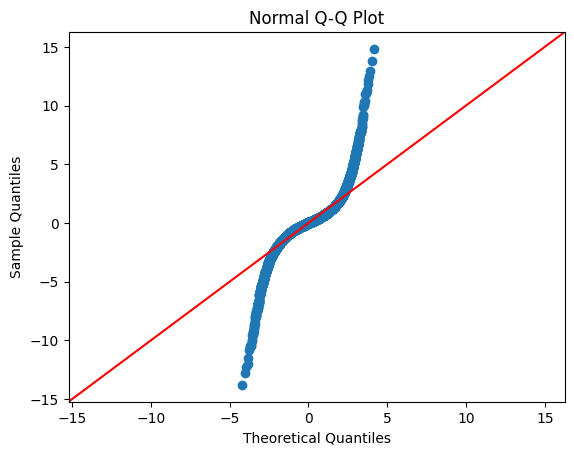

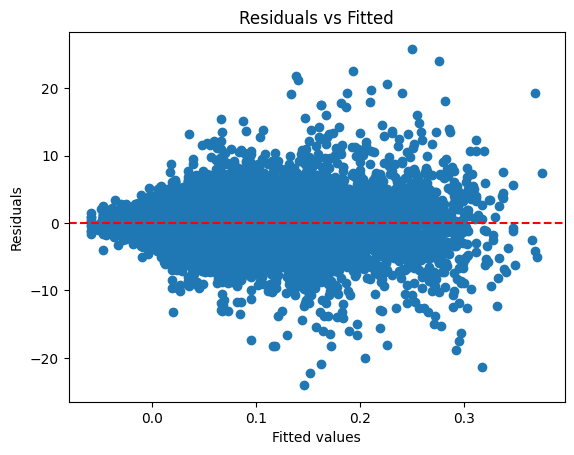

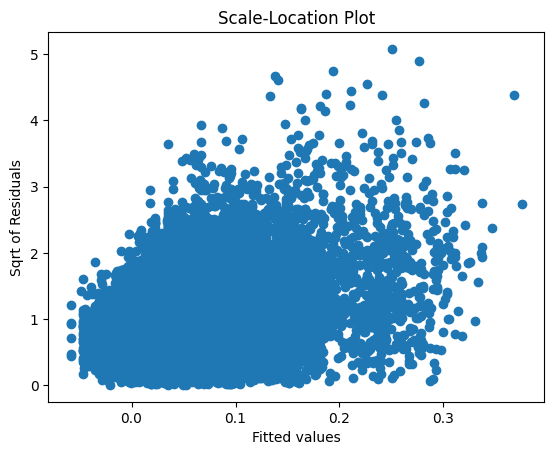

In [56]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_1.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_1.fittedvalues, model_1.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()


The QQ-Plot shows that are data is clearly not normally distributed. The distribution has fatter tailes than that of a normal distribution which can be attributed to outliers. The s-shape is further indicative a leptokurtic distribution which is why a transformation of the data is advisable to make it a better fit to our OLS regression that is based on the assumption that the data is normally distributed. 

The the error variance displayed in the residual vs. fitted plot displays a clear cone-shape, instead of a equal distribution around the red dashed line. The data seems to show non-linearity. Further there seem to be several points that are far away from the central tendency which again shows the presence of outliers. 

In the following model we include all control variables to see wether the performance of the model improves. 

In [57]:
model_2 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=anomalies_df).fit() 

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.935
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.23e-08
Time:                        15:13:54   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      3.118      0.002       0.001       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.890      0.059      -0.002    4.55e-05
C(stock_dummy)[T.2]     -0.0010      0.001     -1.577      0.115      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -1.208      0.227      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.711      0.087      -0.002       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -1.017      0.309      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.201      0.230      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -2.214      0.027      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0012      0.001     -1.989      0.047      -0.002   -1.78e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.495      0.135      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.048      0.041      -0.003   -5.62e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.874      0.061      -0.002    5.55e-05
C(stock_dummy)[T.12]    -0.0022      0.001     -3.307      0.001      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.169      0.243      -0.002       0.000
C(stock_dummy)[T.14]    -0.0012      0.001     -2.018      0.044      -0.002   -3.48e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.282      0.200      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.488      0.137      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.674      0.094      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.360      0.018      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.575      0.115      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -1.012      0.312      -0.002       0.000
C(stock_dummy)[T.21]    -0.0007      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -2.000      0.046      -0.002   -2.43e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.585      0.113      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.704      0.088      -0.000       0.002
C(stock_dummy)[T.25]    -0.0004      0.001     -0.612      0.541      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.606      0.009      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.350      0.019      -0.003      -0.000
name_price_attention     0.0005   8.53e-05      5.991      0.000       0.000       0.001
volume                  -0.0006   9.62e-05     -6.404      0.000      -0.001      -0.000
daily_spread            -0.0002   8.26e-05     -1.883      0.060      -0.000    6.35e-06
mkt_cap                  0.0003      0.000      2.262    

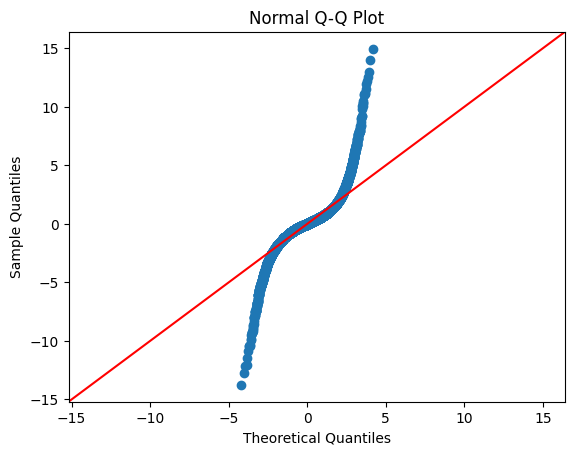

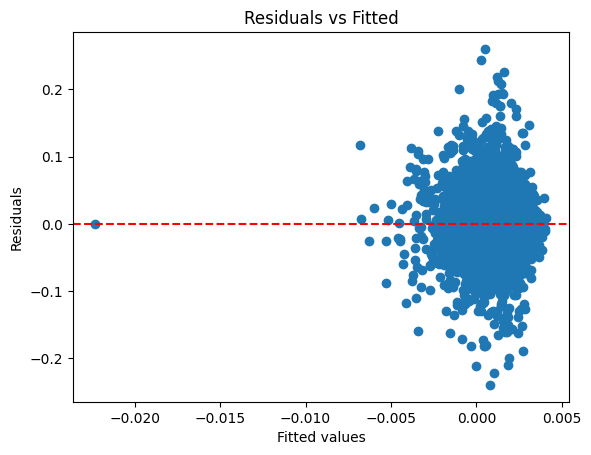

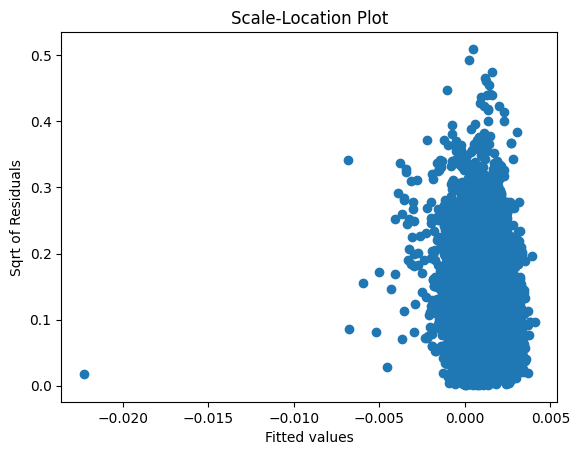

In [58]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_2.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_2.fittedvalues, model_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_2.fittedvalues, model_2.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

The low R-squared values in combination with the high AIC and BIC values suggest that the models have very low to no predictive power.

**Test statistics**

Omnibus Test: The Omnibus test is a statistical test to check the skewness and kurtosis of the residuals. The high value in combination with the a p-value of 0 indicate that the data is not normally distributed. 

Skew: The skew value being close to 0 (0.169) shows that the data seems to be fairly symmetrical. 

Kurtosis: The value being 19.256 is clearly much larger than 3 which implies that the tails are much fatter than that of a normal distribution. 

Durbin-Watson: With a value of 2.103, hence close to 2, we can state that there is no autocorrelation in the residuals. 

Jarque-Bera (JB) Test: Equally to the omnibus test the Jarque-Bera probability is at 0.00 showing that our data is currently non-normally distributed. 

Condition Number: With 57.1 the condition number is a lot higher that 30 which indicates that there could be mutlicollinearity present. 

Given these results we will now perform various test to check why the current model is not performing well. 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = anomalies_df[['name_price_attention', 'stock_dummy' ,  'mkt_cap' , 'volume' , 'jan_dummy' , 'monday_dummy',  'annual_rep_release']]

vif = pd.DataFrame()

vif["Features"] = X.columns

vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


               Features       VIF
0  name_price_attention  1.143785
1           stock_dummy  1.229486
2               mkt_cap  1.449453
3                volume  1.530853
4             jan_dummy  1.064675
5          monday_dummy  1.159603
6    annual_rep_release  1.008621


In [60]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 12164.574314393656, 'p-value': 0.0, 'f-value': 432.24081850311177, 'f p-value': 0.0}


In [61]:
from scipy import stats

shapiro_test = stats.shapiro(model_2.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk test statistic: 0.8701780205191921, p-value: 1.4475269728285066e-111


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_9404/754858582.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70448.
  shapiro_test = stats.shapiro(model_2.resid)


Breusch-Pagan Test: Given the probability of 0 we have to reject the hypothesis of homoskedasticity (constant variance of error).

Shapiro-Wilk Test: The Shapiro-Wilk test statistic is significantly less than 1, and the p-value is essentially 0, which provides strong evidence to reject the null hypothesis that the residuals are normally distributed. 

Given the test results we start by scaling the data. We hereby try to diminish the effect of outliers.

**Scaling the data**

In [62]:
model_3 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.935
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.23e-08
Time:                        15:13:56   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      3.118      0.002       0.001       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.890      0.059      -0.002    4.55e-05
C(stock_dummy)[T.2]     -0.0010      0.001     -1.577      0.115      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -1.208      0.227      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.711      0.087      -0.002       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -1.017      0.309      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.201      0.230      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -2.214      0.027      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0012      0.001     -1.989      0.047      -0.002   -1.78e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.495      0.135      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.048      0.041      -0.003   -5.62e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.874      0.061      -0.002    5.55e-05
C(stock_dummy)[T.12]    -0.0022      0.001     -3.307      0.001      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.169      0.243      -0.002       0.000
C(stock_dummy)[T.14]    -0.0012      0.001     -2.018      0.044      -0.002   -3.48e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.282      0.200      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.488      0.137      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.674      0.094      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.360      0.018      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.575      0.115      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -1.012      0.312      -0.002       0.000
C(stock_dummy)[T.21]    -0.0007      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -2.000      0.046      -0.002   -2.43e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.585      0.113      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.704      0.088      -0.000       0.002
C(stock_dummy)[T.25]    -0.0004      0.001     -0.612      0.541      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.606      0.009      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.350      0.019      -0.003      -0.000
name_price_attention     0.0005   8.53e-05      5.991      0.000       0.000       0.001
volume                  -0.0006   9.62e-05     -6.404      0.000      -0.001      -0.000
daily_spread            -0.0002   8.26e-05     -1.883      0.060      -0.000    6.35e-06
mkt_cap                  0.0003      0.000      2.262    

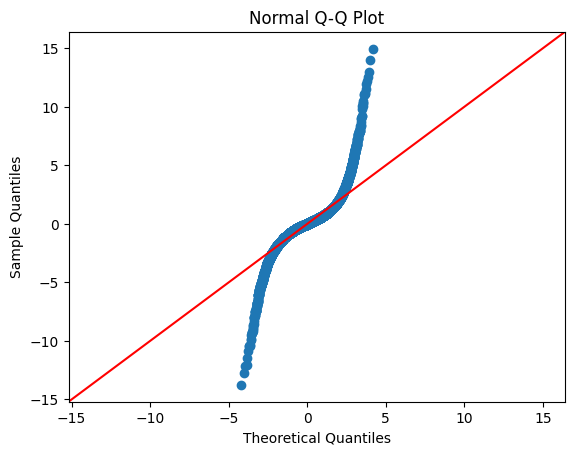

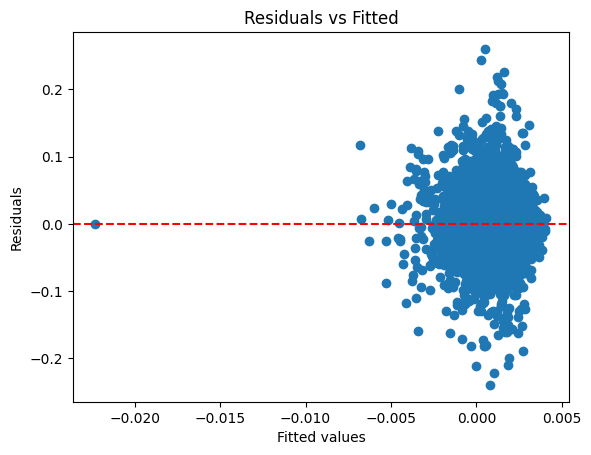

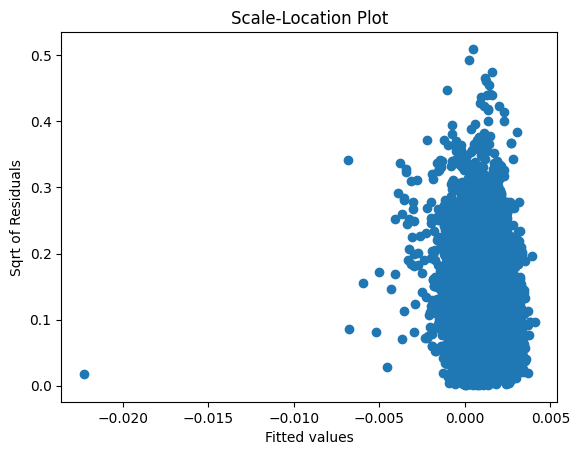

In [63]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_3.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_3.fittedvalues, model_3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_3.fittedvalues, model_3.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

Given these test results it is clear that we need to further transform our data to make it more suitable for linear regression. In the following we will perform logarithmic transformations. We hereby adjust our model to better suit the non-linear relationship of our data.

## Log Transformation of the target variable

In [64]:
model_4 = ols('Q("log_return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.369
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.21e-10
Time:                        15:13:58   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0015      0.001      2.889      0.004       0.000       0.002
C(stock_dummy)[T.1]     -0.0012      0.001     -1.878      0.060      -0.002    5.32e-05
C(stock_dummy)[T.2]     -0.0012      0.001     -1.803      0.071      -0.002       0.000
C(stock_dummy)[T.3]     -0.0009      0.001     -1.402      0.161      -0.002       0.000
C(stock_dummy)[T.4]     -0.0011      0.001     -1.741      0.082      -0.002       0.000
C(stock_dummy)[T.5]     -0.0008      0.001     -1.231      0.218      -0.002       0.000
C(stock_dummy)[T.6]     -0.0006      0.001     -1.059      0.290      -0.002       0.001
C(stock_dummy)[T.7]     -0.0015      0.001     -2.350      0.019      -0.003      -0.000
C(stock_dummy)[T.8]     -0.0013      0.001     -2.117      0.034      -0.003    -9.7e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.539      0.124      -0.002       0.000
C(stock_dummy)[T.10]    -0.0013      0.001     -2.006      0.045      -0.003   -2.92e-05
C(stock_dummy)[T.11]    -0.0012      0.001     -1.940      0.052      -0.003    1.27e-05
C(stock_dummy)[T.12]    -0.0021      0.001     -3.176      0.001      -0.003      -0.001
C(stock_dummy)[T.13]    -0.0006      0.001     -0.973      0.330      -0.002       0.001
C(stock_dummy)[T.14]    -0.0013      0.001     -2.202      0.028      -0.002      -0.000
C(stock_dummy)[T.15]    -0.0008      0.001     -1.431      0.152      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.554      0.120      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.710      0.087      -0.002       0.000
C(stock_dummy)[T.18]    -0.0016      0.001     -2.442      0.015      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.647      0.100      -0.002       0.000
C(stock_dummy)[T.20]    -0.0007      0.001     -1.337      0.181      -0.002       0.000
C(stock_dummy)[T.21]    -0.0008      0.001     -1.296      0.195      -0.002       0.000
C(stock_dummy)[T.22]    -0.0013      0.001     -2.104      0.035      -0.002   -8.78e-05
C(stock_dummy)[T.23]    -0.0011      0.001     -1.717      0.086      -0.002       0.000
C(stock_dummy)[T.24]     0.0013      0.001      2.083      0.037    7.95e-05       0.003
C(stock_dummy)[T.25]    -0.0005      0.001     -0.761      0.447      -0.002       0.001
C(stock_dummy)[T.26]    -0.0015      0.001     -2.410      0.016      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0015      0.001     -2.438      0.015      -0.003      -0.000
name_price_attention     0.0004   8.53e-05      4.867      0.000       0.000       0.001
volume                  -0.0008   9.63e-05     -8.163      0.000      -0.001      -0.001
daily_spread            -0.0004   8.26e-05     -4.368      0.000      -0.001      -0.000
mkt_cap                  0.0004      0.000      3.510    

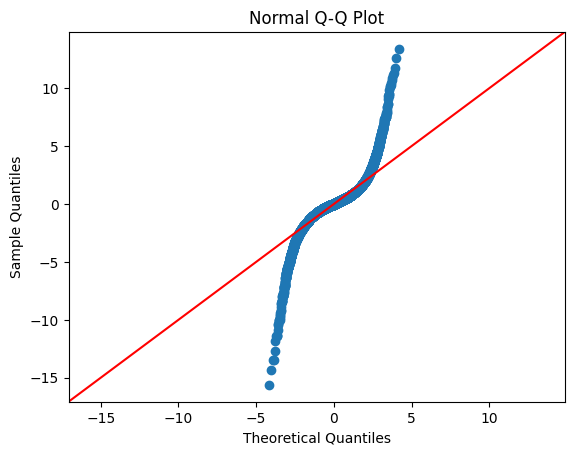

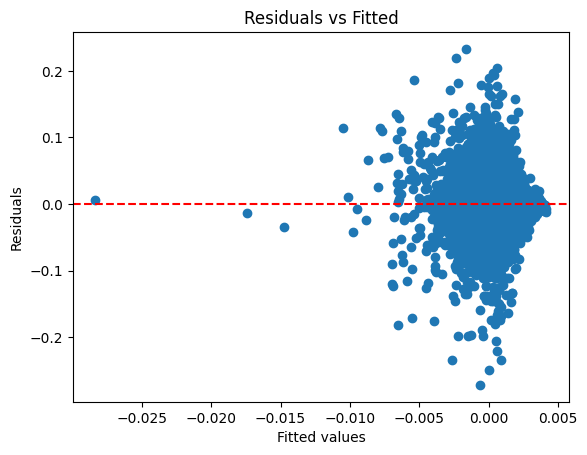

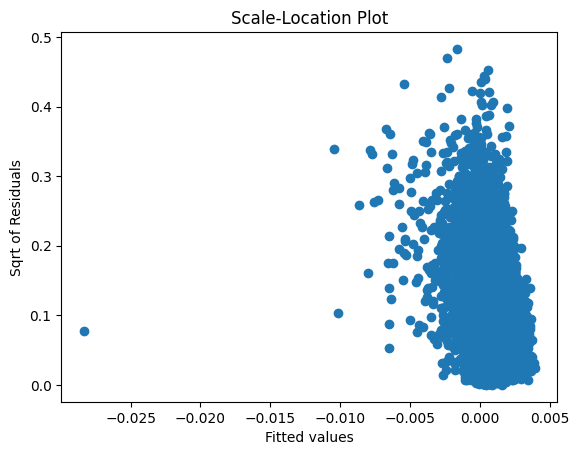

In [65]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_4.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_4.fittedvalues, model_4.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_4.fittedvalues, model_4.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

In [66]:
model_5 = ols('Q("return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.550
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.74e-06
Time:                        15:13:59   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.130      0.259      -0.000       0.002
C(stock_dummy)[T.1]         -0.0007      0.001     -1.042      0.297      -0.002       0.001
C(stock_dummy)[T.2]         -0.0005      0.001     -0.800      0.423      -0.002       0.001
C(stock_dummy)[T.3]         -0.0005      0.001     -0.735      0.462      -0.002       0.001
C(stock_dummy)[T.4]         -0.0006      0.001     -0.925      0.355      -0.002       0.001
C(stock_dummy)[T.5]         -0.0002      0.001     -0.304      0.761      -0.001       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.583      0.560      -0.002       0.001
C(stock_dummy)[T.7]         -0.0010      0.001     -1.631      0.103      -0.002       0.000
C(stock_dummy)[T.8]         -0.0010      0.001     -1.583      0.113      -0.002       0.000
C(stock_dummy)[T.9]         -0.0005      0.001     -0.758      0.448      -0.002       0.001
C(stock_dummy)[T.10]        -0.0008      0.001     -1.307      0.191      -0.002       0.000
C(stock_dummy)[T.11]        -0.0007      0.001     -1.151      0.250      -0.002       0.001
C(stock_dummy)[T.12]        -0.0015      0.001     -2.282      0.022      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.374      0.709      -0.001       0.001
C(stock_dummy)[T.14]        -0.0007      0.001     -1.248      0.212      -0.002       0.000
C(stock_dummy)[T.15]        -0.0003      0.001     -0.532      0.595      -0.001       0.001
C(stock_dummy)[T.16]        -0.0004      0.001     -0.712      0.477      -0.002       0.001
C(stock_dummy)[T.17]        -0.0007      0.001     -1.035      0.301      -0.002       0.001
C(stock_dummy)[T.18]        -0.0012      0.001     -1.820      0.069      -0.002    8.94e-05
C(stock_dummy)[T.19]        -0.0007      0.001     -1.062      0.288      -0.002       0.001
C(stock_dummy)[T.20]        -0.0004      0.001     -0.751      0.453      -0.001       0.001
C(stock_dummy)[T.21]        -0.0003      0.001     -0.499      0.618      -0.002       0.001
C(stock_dummy)[T.22]        -0.0007      0.001     -1.140      0.254      -0.002       0.000
C(stock_dummy)[T.23]        -0.0004      0.001     -0.673      0.501      -0.002       0.001
C(stock_dummy)[T.24]         0.0014      0.001      2.118      0.034       0.000       0.003
C(stock_dummy)[T.25]         0.0001      0.001      0.215      0.830      -0.001       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.842      0.065      -0.002    7.17e-05
C(stock_dummy)[T.27]        -0.0011      0.001     -1.808      0.071      -0.002    9.18e-05
log_name_price_attention     0.0003   6.09e-05      4.776      0.000       0.000       0.000
volume                      -0.0005   9.39e-05     -5.592      0.000      -0.001      -0.000
daily_spread  

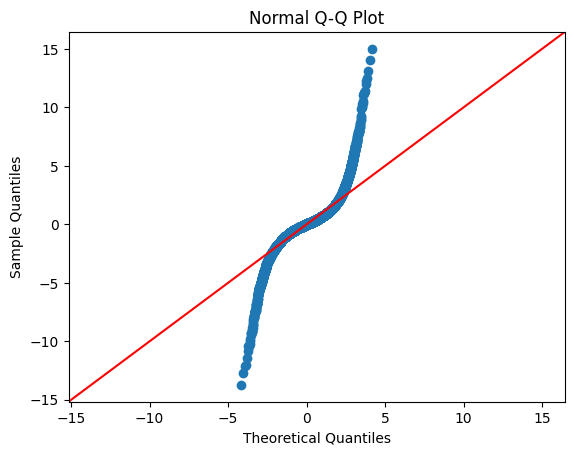

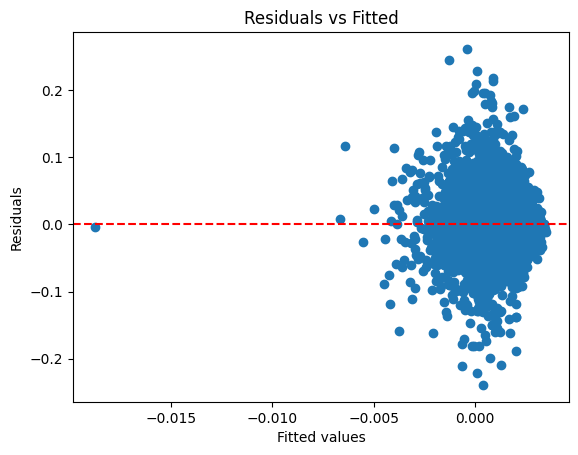

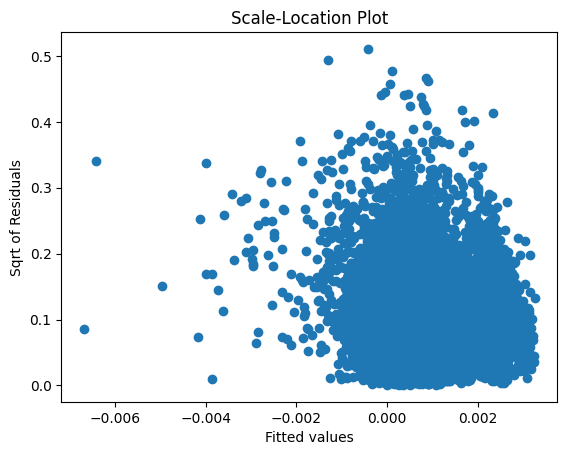

In [67]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_5.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_5.fittedvalues, model_5.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_5.fittedvalues, model_5.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()


In [68]:
model_6 = ols('Q("log_return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.190
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.07e-09
Time:                        15:14:00   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.210      0.226      -0.000       0.002
C(stock_dummy)[T.1]         -0.0008      0.001     -1.209      0.227      -0.002       0.000
C(stock_dummy)[T.2]         -0.0007      0.001     -1.173      0.241      -0.002       0.001
C(stock_dummy)[T.3]         -0.0007      0.001     -1.032      0.302      -0.002       0.001
C(stock_dummy)[T.4]         -0.0007      0.001     -1.141      0.254      -0.002       0.001
C(stock_dummy)[T.5]         -0.0004      0.001     -0.656      0.512      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.590      0.555      -0.002       0.001
C(stock_dummy)[T.7]         -0.0012      0.001     -1.917      0.055      -0.002    2.65e-05
C(stock_dummy)[T.8]         -0.0011      0.001     -1.812      0.070      -0.002    9.11e-05
C(stock_dummy)[T.9]         -0.0006      0.001     -0.937      0.349      -0.002       0.001
C(stock_dummy)[T.10]        -0.0009      0.001     -1.452      0.146      -0.002       0.000
C(stock_dummy)[T.11]        -0.0009      0.001     -1.373      0.170      -0.002       0.000
C(stock_dummy)[T.12]        -0.0016      0.001     -2.426      0.015      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.368      0.713      -0.001       0.001
C(stock_dummy)[T.14]        -0.0009      0.001     -1.563      0.118      -0.002       0.000
C(stock_dummy)[T.15]        -0.0005      0.001     -0.818      0.413      -0.002       0.001
C(stock_dummy)[T.16]        -0.0005      0.001     -0.906      0.365      -0.002       0.001
C(stock_dummy)[T.17]        -0.0008      0.001     -1.212      0.226      -0.002       0.000
C(stock_dummy)[T.18]        -0.0013      0.001     -2.028      0.043      -0.003   -4.36e-05
C(stock_dummy)[T.19]        -0.0008      0.001     -1.253      0.210      -0.002       0.000
C(stock_dummy)[T.20]        -0.0006      0.001     -1.128      0.259      -0.002       0.000
C(stock_dummy)[T.21]        -0.0005      0.001     -0.833      0.405      -0.002       0.001
C(stock_dummy)[T.22]        -0.0008      0.001     -1.404      0.160      -0.002       0.000
C(stock_dummy)[T.23]        -0.0006      0.001     -0.964      0.335      -0.002       0.001
C(stock_dummy)[T.24]         0.0016      0.001      2.418      0.016       0.000       0.003
C(stock_dummy)[T.25]     -2.604e-05      0.001     -0.042      0.967      -0.001       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.847      0.065      -0.002    6.91e-05
C(stock_dummy)[T.27]        -0.0012      0.001     -2.040      0.041      -0.002   -4.86e-05
log_name_price_attention     0.0003   6.09e-05      4.198      0.000       0.000       0.000
volume                      -0.0007    9.4e-05     -7.609      0.000      -0.001      -0.001
daily_spread  

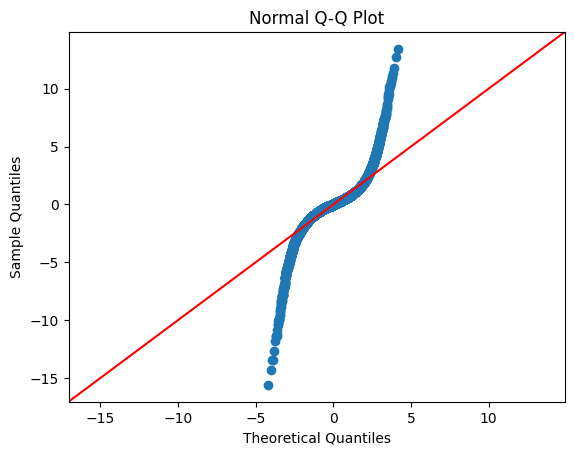

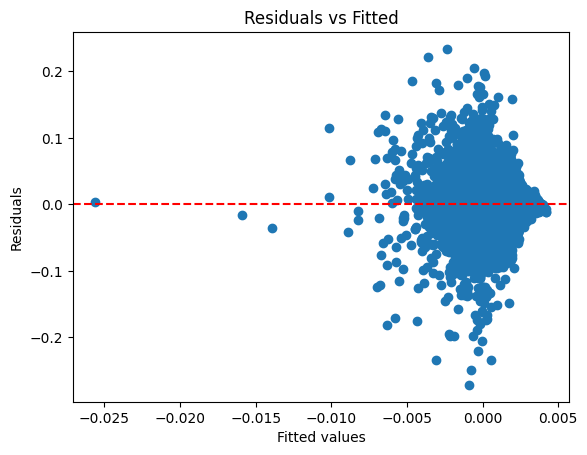

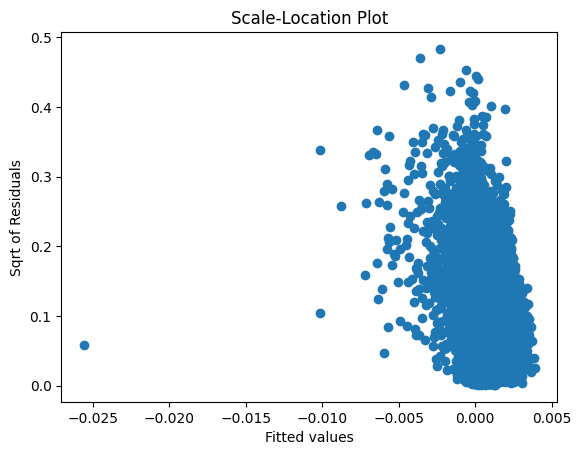

In [69]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_6.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_6.fittedvalues, model_6.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot 
plt.scatter(model_6.fittedvalues, model_6.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

In [70]:
from statsmodels.iolib.summary2 import summary_col

results_list = [model_3, model_4, model_5,  model_6]


regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Model 3', 'Model 4', #'Model 3',
                                   'Model 5', #'Model 5', 
                                   'Model 6', #'Model 7', 'Model 8'
                               ],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Model 3,Model 4,Model 5,Model 6
Intercept,0.0016***,0.0015***,0.0006,0.0006
,(0.0005),(0.0005),(0.0005),(0.0005)
C(stock_dummy)[T.1],-0.0012*,-0.0012*,-0.0007,-0.0008
,(0.0006),(0.0006),(0.0006),(0.0006)
C(stock_dummy)[T.2],-0.0010,-0.0012*,-0.0005,-0.0007
,(0.0006),(0.0006),(0.0006),(0.0006)
C(stock_dummy)[T.3],-0.0008,-0.0009,-0.0005,-0.0007
,(0.0006),(0.0006),(0.0006),(0.0006)
C(stock_dummy)[T.4],-0.0011*,-0.0011*,-0.0006,-0.0007
,(0.0007),(0.0007),(0.0006),(0.0006)


The results show that the 4th model, being the log-linear model, best fits our data. The high Omnibus and Jarque-Bera values show however that further adjustments have to be made to tackle the issue of the prevalent heteroskedacticity. 

In the following we construct a model that is able to calculate more robust standard errors.

## OLS with adjusted covariance type 

In [71]:
model_7 = ols('Q("log_return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_7 = model_7.get_robustcov_results()
robust_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.677
Date:                Fri, 08 Mar 2024   Prob (F-statistic):            0.00802
Time:                        15:14:01   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0015      0.001      2.452      0.014       0.000       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.621      0.105      -0.003       0.000
C(stock_dummy)[T.2]     -0.0012      0.001     -1.552      0.121      -0.003       0.000
C(stock_dummy)[T.3]     -0.0009      0.001     -1.077      0.281      -0.003       0.001
C(stock_dummy)[T.4]     -0.0011      0.001     -1.482      0.138      -0.003       0.000
C(stock_dummy)[T.5]     -0.0008      0.001     -0.997      0.319      -0.002       0.001
C(stock_dummy)[T.6]     -0.0006      0.001     -1.031      0.303      -0.002       0.001
C(stock_dummy)[T.7]     -0.0015      0.001     -2.069      0.039      -0.003   -7.69e-05
C(stock_dummy)[T.8]     -0.0013      0.001     -1.880      0.060      -0.003    5.54e-05
C(stock_dummy)[T.9]     -0.0010      0.001     -1.286      0.198      -0.003       0.001
C(stock_dummy)[T.10]    -0.0013      0.001     -1.754      0.079      -0.003       0.000
C(stock_dummy)[T.11]    -0.0012      0.001     -1.747      0.081      -0.003       0.000
C(stock_dummy)[T.12]    -0.0021      0.001     -2.767      0.006      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0006      0.001     -0.874      0.382      -0.002       0.001
C(stock_dummy)[T.14]    -0.0013      0.001     -2.075      0.038      -0.003   -7.27e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.318      0.188      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.574      0.116      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.571      0.116      -0.002       0.000
C(stock_dummy)[T.18]    -0.0016      0.001     -2.176      0.030      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.566      0.117      -0.002       0.000
C(stock_dummy)[T.20]    -0.0007      0.001     -1.227      0.220      -0.002       0.000
C(stock_dummy)[T.21]    -0.0008      0.001     -1.128      0.259      -0.002       0.001
C(stock_dummy)[T.22]    -0.0013      0.001     -2.014      0.044      -0.003   -3.41e-05
C(stock_dummy)[T.23]    -0.0011      0.001     -1.537      0.124      -0.003       0.000
C(stock_dummy)[T.24]     0.0013      0.001      1.292      0.196      -0.001       0.003
C(stock_dummy)[T.25]    -0.0005      0.001     -0.629      0.529      -0.002       0.001
C(stock_dummy)[T.26]    -0.0015      0.001     -2.365      0.018      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0015      0.001     -2.245      0.025      -0.003      -0.000
name_price_attention     0.0004      0.000      2.691      0.007       0.000       0.001
volume                  -0.0008      0.000     -3.452      0.001      -0.001      -0.000
daily_spread            -0.0004      0.000     -1.207      0.227      -0.001       0.000
mkt_cap                  0.0004      0.000      2.569    

In [72]:
model_8 = ols('Q("return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_8 = model_8.get_robustcov_results()
robust_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.025
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           0.000375
Time:                        15:14:02   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      0.940      0.347      -0.001       0.002
C(stock_dummy)[T.1]         -0.0007      0.001     -0.897      0.370      -0.002       0.001
C(stock_dummy)[T.2]         -0.0005      0.001     -0.676      0.499      -0.002       0.001
C(stock_dummy)[T.3]         -0.0005      0.001     -0.556      0.579      -0.002       0.001
C(stock_dummy)[T.4]         -0.0006      0.001     -0.792      0.428      -0.002       0.001
C(stock_dummy)[T.5]         -0.0002      0.001     -0.243      0.808      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.581      0.561      -0.002       0.001
C(stock_dummy)[T.7]         -0.0010      0.001     -1.427      0.154      -0.002       0.000
C(stock_dummy)[T.8]         -0.0010      0.001     -1.402      0.161      -0.002       0.000
C(stock_dummy)[T.9]         -0.0005      0.001     -0.623      0.534      -0.002       0.001
C(stock_dummy)[T.10]        -0.0008      0.001     -1.149      0.251      -0.002       0.001
C(stock_dummy)[T.11]        -0.0007      0.001     -1.029      0.303      -0.002       0.001
C(stock_dummy)[T.12]        -0.0015      0.001     -2.078      0.038      -0.003   -8.31e-05
C(stock_dummy)[T.13]        -0.0002      0.001     -0.346      0.729      -0.002       0.001
C(stock_dummy)[T.14]        -0.0007      0.001     -1.161      0.246      -0.002       0.001
C(stock_dummy)[T.15]        -0.0003      0.001     -0.483      0.629      -0.002       0.001
C(stock_dummy)[T.16]        -0.0004      0.001     -0.718      0.473      -0.002       0.001
C(stock_dummy)[T.17]        -0.0007      0.001     -0.946      0.344      -0.002       0.001
C(stock_dummy)[T.18]        -0.0012      0.001     -1.618      0.106      -0.003       0.000
C(stock_dummy)[T.19]        -0.0007      0.001     -1.012      0.311      -0.002       0.001
C(stock_dummy)[T.20]        -0.0004      0.001     -0.685      0.493      -0.001       0.001
C(stock_dummy)[T.21]        -0.0003      0.001     -0.432      0.666      -0.002       0.001
C(stock_dummy)[T.22]        -0.0007      0.001     -1.081      0.280      -0.002       0.001
C(stock_dummy)[T.23]        -0.0004      0.001     -0.594      0.552      -0.002       0.001
C(stock_dummy)[T.24]         0.0014      0.001      1.311      0.190      -0.001       0.003
C(stock_dummy)[T.25]         0.0001      0.001      0.175      0.861      -0.001       0.002
C(stock_dummy)[T.26]        -0.0011      0.001     -1.907      0.056      -0.002     3.1e-05
C(stock_dummy)[T.27]        -0.0011      0.001     -1.678      0.093      -0.002       0.000
log_name_price_attention     0.0003   6.73e-05      4.321      0.000       0.000       0.000
volume                      -0.0005      0.000     -2.290      0.022      -0.001   -7.57e-05
daily_spread  

In [73]:
model_9 = ols('Q("log_return") ~  log_name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_9 = model_9.get_robustcov_results()
robust_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.896
Date:                Fri, 08 Mar 2024   Prob (F-statistic):            0.00124
Time:                        15:14:03   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0006      0.001      1.007      0.314      -0.001       0.002
C(stock_dummy)[T.1]         -0.0008      0.001     -1.040      0.298      -0.002       0.001
C(stock_dummy)[T.2]         -0.0007      0.001     -0.991      0.322      -0.002       0.001
C(stock_dummy)[T.3]         -0.0007      0.001     -0.781      0.435      -0.002       0.001
C(stock_dummy)[T.4]         -0.0007      0.001     -0.975      0.330      -0.002       0.001
C(stock_dummy)[T.5]         -0.0004      0.001     -0.525      0.599      -0.002       0.001
C(stock_dummy)[T.6]         -0.0004      0.001     -0.587      0.557      -0.002       0.001
C(stock_dummy)[T.7]         -0.0012      0.001     -1.673      0.094      -0.003       0.000
C(stock_dummy)[T.8]         -0.0011      0.001     -1.604      0.109      -0.002       0.000
C(stock_dummy)[T.9]         -0.0006      0.001     -0.769      0.442      -0.002       0.001
C(stock_dummy)[T.10]        -0.0009      0.001     -1.274      0.203      -0.002       0.000
C(stock_dummy)[T.11]        -0.0009      0.001     -1.226      0.220      -0.002       0.001
C(stock_dummy)[T.12]        -0.0016      0.001     -2.203      0.028      -0.003      -0.000
C(stock_dummy)[T.13]        -0.0002      0.001     -0.341      0.733      -0.002       0.001
C(stock_dummy)[T.14]        -0.0009      0.001     -1.451      0.147      -0.002       0.000
C(stock_dummy)[T.15]        -0.0005      0.001     -0.743      0.458      -0.002       0.001
C(stock_dummy)[T.16]        -0.0005      0.001     -0.913      0.361      -0.002       0.001
C(stock_dummy)[T.17]        -0.0008      0.001     -1.106      0.269      -0.002       0.001
C(stock_dummy)[T.18]        -0.0013      0.001     -1.800      0.072      -0.003       0.000
C(stock_dummy)[T.19]        -0.0008      0.001     -1.194      0.233      -0.002       0.000
C(stock_dummy)[T.20]        -0.0006      0.001     -1.029      0.303      -0.002       0.001
C(stock_dummy)[T.21]        -0.0005      0.001     -0.721      0.471      -0.002       0.001
C(stock_dummy)[T.22]        -0.0008      0.001     -1.330      0.184      -0.002       0.000
C(stock_dummy)[T.23]        -0.0006      0.001     -0.849      0.396      -0.002       0.001
C(stock_dummy)[T.24]         0.0016      0.001      1.502      0.133      -0.000       0.004
C(stock_dummy)[T.25]     -2.604e-05      0.001     -0.034      0.973      -0.002       0.001
C(stock_dummy)[T.26]        -0.0011      0.001     -1.911      0.056      -0.002    2.89e-05
C(stock_dummy)[T.27]        -0.0012      0.001     -1.890      0.059      -0.003    4.56e-05
log_name_price_attention     0.0003   6.72e-05      3.805      0.000       0.000       0.000
volume                      -0.0007      0.000     -3.099      0.002      -0.001      -0.000
daily_spread  

In [74]:
model_10 = ols('Q("return") ~  name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release', data=df_scaled).fit() 
robust_model_10 = model_10.get_robustcov_results()
robust_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.769
Date:                Fri, 08 Mar 2024   Prob (F-statistic):            0.00374
Time:                        15:14:03   Log-Likelihood:             1.8547e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70413   BIC:                        -3.705e+05
Df Model:                          34                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0016      0.001      2.651      0.008       0.000       0.003
C(stock_dummy)[T.1]     -0.0012      0.001     -1.634      0.102      -0.003       0.000
C(stock_dummy)[T.2]     -0.0010      0.001     -1.358      0.175      -0.002       0.000
C(stock_dummy)[T.3]     -0.0008      0.001     -0.928      0.353      -0.002       0.001
C(stock_dummy)[T.4]     -0.0011      0.001     -1.460      0.144      -0.003       0.000
C(stock_dummy)[T.5]     -0.0006      0.001     -0.823      0.411      -0.002       0.001
C(stock_dummy)[T.6]     -0.0007      0.001     -1.171      0.242      -0.002       0.000
C(stock_dummy)[T.7]     -0.0014      0.001     -1.955      0.051      -0.003    3.71e-06
C(stock_dummy)[T.8]     -0.0012      0.001     -1.768      0.077      -0.003       0.000
C(stock_dummy)[T.9]     -0.0010      0.001     -1.251      0.211      -0.002       0.001
C(stock_dummy)[T.10]    -0.0013      0.001     -1.797      0.072      -0.003       0.000
C(stock_dummy)[T.11]    -0.0012      0.001     -1.691      0.091      -0.003       0.000
C(stock_dummy)[T.12]    -0.0022      0.001     -2.890      0.004      -0.004      -0.001
C(stock_dummy)[T.13]    -0.0007      0.001     -1.050      0.294      -0.002       0.001
C(stock_dummy)[T.14]    -0.0012      0.001     -1.907      0.057      -0.002    3.37e-05
C(stock_dummy)[T.15]    -0.0008      0.001     -1.181      0.238      -0.002       0.000
C(stock_dummy)[T.16]    -0.0009      0.001     -1.510      0.131      -0.002       0.000
C(stock_dummy)[T.17]    -0.0011      0.001     -1.541      0.123      -0.002       0.000
C(stock_dummy)[T.18]    -0.0015      0.001     -2.109      0.035      -0.003      -0.000
C(stock_dummy)[T.19]    -0.0010      0.001     -1.499      0.134      -0.002       0.000
C(stock_dummy)[T.20]    -0.0005      0.001     -0.929      0.353      -0.002       0.001
C(stock_dummy)[T.21]    -0.0007      0.001     -0.922      0.357      -0.002       0.001
C(stock_dummy)[T.22]    -0.0012      0.001     -1.918      0.055      -0.002    2.65e-05
C(stock_dummy)[T.23]    -0.0010      0.001     -1.423      0.155      -0.002       0.000
C(stock_dummy)[T.24]     0.0011      0.001      1.054      0.292      -0.001       0.003
C(stock_dummy)[T.25]    -0.0004      0.001     -0.507      0.612      -0.002       0.001
C(stock_dummy)[T.26]    -0.0016      0.001     -2.560      0.010      -0.003      -0.000
C(stock_dummy)[T.27]    -0.0014      0.001     -2.170      0.030      -0.003      -0.000
name_price_attention     0.0005      0.000      3.302      0.001       0.000       0.001
volume                  -0.0006      0.000     -2.725      0.006      -0.001      -0.000
daily_spread            -0.0002      0.000     -0.516      0.606      -0.001       0.000
mkt_cap                  0.0003      0.000      1.656    

In [75]:
from statsmodels.iolib.summary2 import summary_col

results_list = [robust_model_7, robust_model_8, robust_model_9,  robust_model_10 ]

regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Model 7', 'Model 8', #'Model 3',
                                   'Model 9', #'Model 5', 
                                   'Model 10', #'Model 7', 'Model 8'
                               ],
                               #float_format="%0.0002f",
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Model 7,Model 8,Model 9,Model 10
Intercept,0.0015**,0.0006,0.0006,0.0016***
,(0.0006),(0.0006),(0.0006),(0.0006)
C(stock_dummy)[T.1],-0.0012,-0.0007,-0.0008,-0.0012
,(0.0007),(0.0007),(0.0007),(0.0007)
C(stock_dummy)[T.2],-0.0012,-0.0005,-0.0007,-0.0010
,(0.0007),(0.0008),(0.0008),(0.0007)
C(stock_dummy)[T.3],-0.0009,-0.0005,-0.0007,-0.0008
,(0.0008),(0.0008),(0.0008),(0.0008)
C(stock_dummy)[T.4],-0.0011,-0.0006,-0.0007,-0.0011
,(0.0008),(0.0007),(0.0008),(0.0008)


Given the results the adjusted covariance is not enough to tackle the issue of heteroskedasticity. We there further adjust the model by now using the Huber T norm. The norm is statistically more robust than other regularization norms as it applies quadratic loss near the origin and linear loss for points that are further away from the mean. It thereby reduzes the effect of outliers.

## Robust Regression using the Huber T norm

In [76]:
import statsmodels.formula.api as smf
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release'

model_rlm1 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm1 = model_rlm1.fit()

results_rlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70413
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:14:20                                         
No. Iterations:                    50                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0017      0.000      4.802      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0017      0.000     -3.593      0.000      -0.003      -0.001
C(stock_dummy)[T.2]     -0.0013      0.000     -2.886      0.004      -0.002      -0.000
C(stock_dummy)[T.3]     -0.0010      0.000     -2.194      0.028      -0.002      -0.000
C(stock_dummy)[T.4]     -0.0015      0.000     -3.157      0.002      -0.002      -0.001
C(stock_dummy)[T.5]     -0.0007      0.000     -1.539      0.124      -0.002       0.000
C(stock_dummy)[T.6]     -0.0010      0.000     -2.324      0.020      -0.002      -0.000
C(stock_dummy)[T.7]     -0.0018      0.000     -4.068      0.000      -0.003      -0.001
C(stock_dummy)[T.8]     -0.0017      0.000     -3.769      0.000      -0.003      -0.001
C(stock_dummy)[T.9]     -0.0010      0.000     -2.206      0.027      -0.002      -0.000
C(stock_dummy)[T.10]    -0.0014      0.000     -3.105      0.002      -0.002      -0.001
C(stock_dummy)[T.11]    -0.0015      0.000     -3.217      0.001      -0.002      -0.001
C(stock_dummy)[T.12]    -0.0026      0.000     -5.463      0.000      -0.004      -0.002
C(stock_dummy)[T.13]    -0.0011      0.000     -2.383      0.017      -0.002      -0.000
C(stock_dummy)[T.14]    -0.0015      0.000     -3.516      0.000      -0.002      -0.001
C(stock_dummy)[T.15]    -0.0012      0.000     -2.695      0.007      -0.002      -0.000
C(stock_dummy)[T.16]    -0.0012      0.000     -2.688      0.007      -0.002      -0.000
C(stock_dummy)[T.17]    -0.0015      0.000     -3.253      0.001      -0.002      -0.001
C(stock_dummy)[T.18]    -0.0017      0.000     -3.584      0.000      -0.003      -0.001
C(stock_dummy)[T.19]    -0.0015      0.000     -3.295      0.001      -0.002      -0.001
C(stock_dummy)[T.20]    -0.0008      0.000     -2.093      0.036      -0.001   -4.87e-05
C(stock_dummy)[T.21]    -0.0011      0.000     -2.467      0.014      -0.002      -0.000
C(stock_dummy)[T.22]    -0.0016      0.000     -3.626      0.000      -0.002      -0.001
C(stock_dummy)[T.23]    -0.0012      0.000     -2.609      0.009      -0.002      -0.000
C(stock_dummy)[T.24]     0.0015      0.000      3.190      0.001       0.001       0.002
C(stock_dummy)[T.25]    -0.0006      0.000     -1.334      0.182      -0.001       0.000
C(stock_dummy)[T.26]    -0.0022      0.000     -4.879      0.000      -0.003      -0.001
C(stock_dummy)[T.27]    -0.0019      0.000     -4.345      0.000      -0.003      -0.001
name_price_attention     0.0007   6.16e-05     10.750      0.000       0.001       0.001
volume                  -0.0009   6.94e-05    -12.565      0.000      -0.001      -0.001
daily_spread            -0.0009   5.96e-05    -15.024      0.000      -0.001      -0.001
mkt_cap                  0.0003   8.32e-05      3.913    

In [77]:
# Weighted Residual Sum of Squares (RSS)
RSS = sum(results_rlm1.weights * results_rlm1.resid ** 2)

# Total Sum of Squares (TSS) - weighted by the model weights since it's RLM
TSS = sum(results_rlm1.weights * (df_scaled['log_return'] - np.average(df_scaled['log_return'], weights=results_rlm1.weights)) ** 2)

# weighted R-squared
weighted_r_squared = 1 - RSS / TSS

# pseudo R-squared as if it were OLS

print(f'Weighted R-squared: {weighted_r_squared:.4f}')

predictions = results_rlm1.predict(df_scaled)
actual_values = df_scaled['log_return']

# Mean Squared Error (MSE)
mse = sm.tools.eval_measures.mse(actual_values, predictions)


print(f'Mean Squared Error: {mse:.4f}')

Weighted R-squared: 0.0051
Mean Squared Error: 0.0003


MSE is the average squared difference between the estimated values and the actual value. A low MSE indicates close fitting to the actual data. 

The weighted r-sqaured value is quite low, indicating that the model does not explain much of the variance in the dependent variable, log_return. In the context of financial returns, it's not uncommon for R-squared values to be low, as return series are often quite noisy and difficult to predict. The effect of attention is further fairly low. The following are possible explanations for this: 

1. Taildness of returns:

Returns are not normally distributed. They exhibit volatility and outliers, which is why modeling based on historical data might not yield the most accurate results. Additionally our time range covers the COVID-19 pandemic, which increased the presence of outliers and volatility. 

2. Market Efficiency of the stock market: 

Since the stock market is highly efficient, the behavior and attention of retail investors might have a limited impact on stock prices, as any information that could have influenced their behavior would already be reflected in the stock prices.

3. Retail Investor attention`s effect is there but small: 

Even if retail investor attention does have an impact, it may be transient or overshadowed by larger market forces. While retail investor attention could have some influence, other factors such as institutional investor behavior, macroeconomic indicators, global market trends, and unforeseen news events may play a more significant role in the pricing of stocks and the resultant returns.

Nevertheless this model was able to achieve the highest R squared value and a good MSE which is why we can conclude that this model fits our data best. 

To check the validity of our model we will now test the robustness of our model. 

## Robustness Test 



In [78]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention'

model_rlm2 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm2 = model_rlm2.fit()

results_rlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:14:27                                         
No. Iterations:                    31                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0011      0.000      4.375      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0007      0.000     -1.941      0.052      -0.001    6.74e-06
C(stock_dummy)[T.2]     -0.0003      0.000     -0.811      0.417      -0.001       0.000
C(stock_dummy)[T.3]     -0.0004      0.000     -1.027      0.304      -0.001       0.000
C(stock_dummy)[T.4]     -0.0005      0.000     -1.294      0.196      -0.001       0.000
C(stock_dummy)[T.5]      0.0002      0.000      0.478      0.633      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -1.381      0.167      -0.001       0.000
C(stock_dummy)[T.7]     -0.0008      0.000     -2.133      0.033      -0.001   -6.13e-05
C(stock_dummy)[T.8]     -0.0008      0.000     -2.153      0.031      -0.001   -6.88e-05
C(stock_dummy)[T.9]     -0.0003      0.000     -0.883      0.377      -0.001       0.000
C(stock_dummy)[T.10]    -0.0003      0.000     -0.874      0.382      -0.001       0.000
C(stock_dummy)[T.11]    -0.0004      0.000     -1.073      0.283      -0.001       0.000
C(stock_dummy)[T.12]    -0.0012      0.000     -3.454      0.001      -0.002      -0.001
C(stock_dummy)[T.13]    -0.0007      0.000     -1.969      0.049      -0.001   -3.09e-06
C(stock_dummy)[T.14]    -0.0004      0.000     -1.114      0.265      -0.001       0.000
C(stock_dummy)[T.15]    -0.0003      0.000     -0.843      0.399      -0.001       0.000
C(stock_dummy)[T.16]    -0.0004      0.000     -0.998      0.318      -0.001       0.000
C(stock_dummy)[T.17]    -0.0004      0.000     -1.243      0.214      -0.001       0.000
C(stock_dummy)[T.18]    -0.0006      0.000     -1.682      0.093      -0.001    9.91e-05
C(stock_dummy)[T.19]    -0.0005      0.000     -1.345      0.179      -0.001       0.000
C(stock_dummy)[T.20]  1.333e-05      0.000      0.038      0.970      -0.001       0.001
C(stock_dummy)[T.21]    -0.0002      0.000     -0.623      0.533      -0.001       0.000
C(stock_dummy)[T.22]    -0.0005      0.000     -1.388      0.165      -0.001       0.000
C(stock_dummy)[T.23]    -0.0002      0.000     -0.431      0.667      -0.001       0.001
C(stock_dummy)[T.24]     0.0002      0.000      0.642      0.521      -0.000       0.001
C(stock_dummy)[T.25]     0.0001      0.000      0.280      0.780      -0.001       0.001
C(stock_dummy)[T.26]    -0.0013      0.000     -3.584      0.000      -0.002      -0.001
C(stock_dummy)[T.27]    -0.0007      0.000     -1.907      0.057      -0.001    1.89e-05
name_price_attention     0.0005   5.49e-05      8.200      0.000       0.000       0.001
========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"

In [79]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + mkt_cap'

model_rlm3 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm3 = model_rlm3.fit()

results_rlm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70418
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:14:35                                         
No. Iterations:                    29                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0010      0.000      2.962      0.003       0.000       0.002
C(stock_dummy)[T.1]     -0.0006      0.000     -1.339      0.181      -0.001       0.000
C(stock_dummy)[T.2]     -0.0002      0.000     -0.444      0.657      -0.001       0.001
C(stock_dummy)[T.3]     -0.0003      0.000     -0.627      0.531      -0.001       0.001
C(stock_dummy)[T.4]     -0.0004      0.000     -0.795      0.426      -0.001       0.001
C(stock_dummy)[T.5]      0.0003      0.000      0.595      0.552      -0.001       0.001
C(stock_dummy)[T.6]     -0.0004      0.000     -0.909      0.363      -0.001       0.000
C(stock_dummy)[T.7]     -0.0007      0.000     -1.553      0.120      -0.002       0.000
C(stock_dummy)[T.8]     -0.0007      0.000     -1.580      0.114      -0.002       0.000
C(stock_dummy)[T.9]     -0.0002      0.000     -0.500      0.617      -0.001       0.001
C(stock_dummy)[T.10]    -0.0002      0.000     -0.507      0.612      -0.001       0.001
C(stock_dummy)[T.11]    -0.0003      0.000     -0.648      0.517      -0.001       0.001
C(stock_dummy)[T.12]    -0.0011      0.000     -2.471      0.013      -0.002      -0.000
C(stock_dummy)[T.13]    -0.0006      0.000     -1.365      0.172      -0.001       0.000
C(stock_dummy)[T.14]    -0.0003      0.000     -0.795      0.427      -0.001       0.000
C(stock_dummy)[T.15]    -0.0002      0.000     -0.544      0.586      -0.001       0.001
C(stock_dummy)[T.16]    -0.0003      0.000     -0.641      0.521      -0.001       0.001
C(stock_dummy)[T.17]    -0.0004      0.000     -0.800      0.424      -0.001       0.001
C(stock_dummy)[T.18]    -0.0005      0.000     -1.139      0.255      -0.001       0.000
C(stock_dummy)[T.19]    -0.0004      0.000     -0.908      0.364      -0.001       0.000
C(stock_dummy)[T.20]  3.034e-05      0.000      0.085      0.932      -0.001       0.001
C(stock_dummy)[T.21]    -0.0001      0.000     -0.306      0.760      -0.001       0.001
C(stock_dummy)[T.22]    -0.0004      0.000     -0.981      0.327      -0.001       0.000
C(stock_dummy)[T.23] -5.723e-05      0.000     -0.127      0.899      -0.001       0.001
C(stock_dummy)[T.24]     0.0003      0.000      0.734      0.463      -0.001       0.001
C(stock_dummy)[T.25]     0.0002      0.000      0.421      0.673      -0.001       0.001
C(stock_dummy)[T.26]    -0.0012      0.000     -2.677      0.007      -0.002      -0.000
C(stock_dummy)[T.27]    -0.0006      0.000     -1.414      0.157      -0.001       0.000
name_price_attention     0.0004    5.8e-05      7.640      0.000       0.000       0.001
mkt_cap               3.004e-05   8.09e-05      0.371      0.711      -0.000       0.000
========================================================================================

If the model instance has been used for another fit with

In [80]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + volume'

model_rlm4 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm4 = model_rlm4.fit()

results_rlm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70418
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:14:43                                         
No. Iterations:                    34                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0027      0.000      8.976      0.000       0.002       0.003
C(stock_dummy)[T.1]     -0.0027      0.000     -6.646      0.000      -0.003      -0.002
C(stock_dummy)[T.2]     -0.0022      0.000     -5.408      0.000      -0.003      -0.001
C(stock_dummy)[T.3]     -0.0022      0.000     -5.486      0.000      -0.003      -0.001
C(stock_dummy)[T.4]     -0.0024      0.000     -6.006      0.000      -0.003      -0.002
C(stock_dummy)[T.5]     -0.0017      0.000     -4.179      0.000      -0.002      -0.001
C(stock_dummy)[T.6]     -0.0016      0.000     -4.295      0.000      -0.002      -0.001
C(stock_dummy)[T.7]     -0.0025      0.000     -6.414      0.000      -0.003      -0.002
C(stock_dummy)[T.8]     -0.0024      0.000     -6.231      0.000      -0.003      -0.002
C(stock_dummy)[T.9]     -0.0022      0.000     -5.581      0.000      -0.003      -0.001
C(stock_dummy)[T.10]    -0.0023      0.000     -5.641      0.000      -0.003      -0.001
C(stock_dummy)[T.11]    -0.0023      0.000     -5.815      0.000      -0.003      -0.002
C(stock_dummy)[T.12]    -0.0033      0.000     -8.017      0.000      -0.004      -0.003
C(stock_dummy)[T.13]    -0.0016      0.000     -4.460      0.000      -0.002      -0.001
C(stock_dummy)[T.14]    -0.0021      0.000     -5.347      0.000      -0.003      -0.001
C(stock_dummy)[T.15]    -0.0018      0.000     -4.584      0.000      -0.003      -0.001
C(stock_dummy)[T.16]    -0.0018      0.000     -4.584      0.000      -0.003      -0.001
C(stock_dummy)[T.17]    -0.0023      0.000     -5.863      0.000      -0.003      -0.002
C(stock_dummy)[T.18]    -0.0026      0.000     -6.343      0.000      -0.003      -0.002
C(stock_dummy)[T.19]    -0.0021      0.000     -5.407      0.000      -0.003      -0.001
C(stock_dummy)[T.20]    -0.0008      0.000     -2.292      0.022      -0.002      -0.000
C(stock_dummy)[T.21]    -0.0019      0.000     -4.919      0.000      -0.003      -0.001
C(stock_dummy)[T.22]    -0.0022      0.000     -5.596      0.000      -0.003      -0.001
C(stock_dummy)[T.23]    -0.0021      0.000     -5.250      0.000      -0.003      -0.001
C(stock_dummy)[T.24]    -0.0009      0.000     -2.368      0.018      -0.002      -0.000
C(stock_dummy)[T.25]    -0.0017      0.000     -4.346      0.000      -0.003      -0.001
C(stock_dummy)[T.26]    -0.0027      0.000     -7.030      0.000      -0.003      -0.002
C(stock_dummy)[T.27]    -0.0025      0.000     -6.234      0.000      -0.003      -0.002
name_price_attention     0.0006   5.78e-05     10.039      0.000       0.000       0.001
volume                  -0.0008   6.79e-05    -11.998      0.000      -0.001      -0.001
========================================================================================

If the model instance has been used for another fit with

In [81]:
# Define the formula
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + daily_spread'

# Fit the model using RLM for a robust regression
model_rlm5 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm5 = model_rlm5.fit()

# Print the summary
results_rlm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70418
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:14:53                                         
No. Iterations:                    38                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0010      0.000      4.029      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0006      0.000     -1.616      0.106      -0.001       0.000
C(stock_dummy)[T.2]     -0.0003      0.000     -0.967      0.334      -0.001       0.000
C(stock_dummy)[T.3]  -8.399e-05      0.000     -0.234      0.815      -0.001       0.001
C(stock_dummy)[T.4]     -0.0005      0.000     -1.330      0.184      -0.001       0.000
C(stock_dummy)[T.5]      0.0003      0.000      0.705      0.481      -0.000       0.001
C(stock_dummy)[T.6]     -0.0008      0.000     -2.309      0.021      -0.002      -0.000
C(stock_dummy)[T.7]     -0.0009      0.000     -2.445      0.014      -0.002      -0.000
C(stock_dummy)[T.8]     -0.0008      0.000     -2.350      0.019      -0.002      -0.000
C(stock_dummy)[T.9]   1.099e-05      0.000      0.031      0.976      -0.001       0.001
C(stock_dummy)[T.10]    -0.0003      0.000     -0.794      0.427      -0.001       0.000
C(stock_dummy)[T.11]    -0.0004      0.000     -1.183      0.237      -0.001       0.000
C(stock_dummy)[T.12]    -0.0015      0.000     -4.191      0.000      -0.002      -0.001
C(stock_dummy)[T.13]    -0.0011      0.000     -2.965      0.003      -0.002      -0.000
C(stock_dummy)[T.14]    -0.0005      0.000     -1.294      0.196      -0.001       0.000
C(stock_dummy)[T.15]    -0.0004      0.000     -1.128      0.259      -0.001       0.000
C(stock_dummy)[T.16]    -0.0006      0.000     -1.621      0.105      -0.001       0.000
C(stock_dummy)[T.17]    -0.0005      0.000     -1.273      0.203      -0.001       0.000
C(stock_dummy)[T.18]    -0.0006      0.000     -1.676      0.094      -0.001       0.000
C(stock_dummy)[T.19]    -0.0007      0.000     -1.877      0.061      -0.001    2.97e-05
C(stock_dummy)[T.20] -3.772e-05      0.000     -0.106      0.915      -0.001       0.001
C(stock_dummy)[T.21]    -0.0003      0.000     -0.749      0.454      -0.001       0.000
C(stock_dummy)[T.22]    -0.0006      0.000     -1.793      0.073      -0.001    5.94e-05
C(stock_dummy)[T.23]    -0.0002      0.000     -0.511      0.609      -0.001       0.001
C(stock_dummy)[T.24]     0.0017      0.000      4.337      0.000       0.001       0.002
C(stock_dummy)[T.25]     0.0005      0.000      1.443      0.149      -0.000       0.001
C(stock_dummy)[T.26]    -0.0017      0.000     -4.671      0.000      -0.002      -0.001
C(stock_dummy)[T.27]    -0.0009      0.000     -2.452      0.014      -0.002      -0.000
name_price_attention     0.0006   5.73e-05     10.294      0.000       0.000       0.001
daily_spread            -0.0009   5.92e-05    -14.754      0.000      -0.001      -0.001
========================================================================================

If the model instance has been used for another fit with

In [82]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + daily_spread + volume + mkt_cap'

model_rlm6 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm6 = model_rlm6.fit()

results_rlm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70416
Method:                          IRLS   Df Model:                           31
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:15:07                                         
No. Iterations:                    50                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0018      0.000      4.891      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0017      0.000     -3.587      0.000      -0.003      -0.001
C(stock_dummy)[T.2]     -0.0013      0.000     -2.898      0.004      -0.002      -0.000
C(stock_dummy)[T.3]     -0.0010      0.000     -2.198      0.028      -0.002      -0.000
C(stock_dummy)[T.4]     -0.0015      0.000     -3.151      0.002      -0.002      -0.001
C(stock_dummy)[T.5]     -0.0007      0.000     -1.534      0.125      -0.002       0.000
C(stock_dummy)[T.6]     -0.0010      0.000     -2.294      0.022      -0.002      -0.000
C(stock_dummy)[T.7]     -0.0018      0.000     -4.078      0.000      -0.003      -0.001
C(stock_dummy)[T.8]     -0.0017      0.000     -3.781      0.000      -0.003      -0.001
C(stock_dummy)[T.9]     -0.0010      0.000     -2.198      0.028      -0.002      -0.000
C(stock_dummy)[T.10]    -0.0014      0.000     -3.101      0.002      -0.002      -0.001
C(stock_dummy)[T.11]    -0.0015      0.000     -3.224      0.001      -0.002      -0.001
C(stock_dummy)[T.12]    -0.0026      0.000     -5.442      0.000      -0.004      -0.002
C(stock_dummy)[T.13]    -0.0010      0.000     -2.340      0.019      -0.002      -0.000
C(stock_dummy)[T.14]    -0.0015      0.000     -3.535      0.000      -0.002      -0.001
C(stock_dummy)[T.15]    -0.0012      0.000     -2.700      0.007      -0.002      -0.000
C(stock_dummy)[T.16]    -0.0012      0.000     -2.698      0.007      -0.002      -0.000
C(stock_dummy)[T.17]    -0.0015      0.000     -3.268      0.001      -0.002      -0.001
C(stock_dummy)[T.18]    -0.0017      0.000     -3.589      0.000      -0.003      -0.001
C(stock_dummy)[T.19]    -0.0015      0.000     -3.298      0.001      -0.002      -0.001
C(stock_dummy)[T.20]    -0.0008      0.000     -2.116      0.034      -0.001    -5.7e-05
C(stock_dummy)[T.21]    -0.0011      0.000     -2.486      0.013      -0.002      -0.000
C(stock_dummy)[T.22]    -0.0016      0.000     -3.639      0.000      -0.002      -0.001
C(stock_dummy)[T.23]    -0.0012      0.000     -2.620      0.009      -0.002      -0.000
C(stock_dummy)[T.24]     0.0015      0.000      3.201      0.001       0.001       0.002
C(stock_dummy)[T.25]    -0.0006      0.000     -1.354      0.176      -0.001       0.000
C(stock_dummy)[T.26]    -0.0022      0.000     -4.855      0.000      -0.003      -0.001
C(stock_dummy)[T.27]    -0.0019      0.000     -4.351      0.000      -0.003      -0.001
name_price_attention     0.0007   6.16e-05     10.626      0.000       0.001       0.001
daily_spread            -0.0009   5.96e-05    -15.133      0.000      -0.001      -0.001
volume                  -0.0009   6.94e-05    -12.770      0.000      -0.001      -0.001
mkt_cap                  0.0003   8.32e-05      4.042    

In [83]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + daily_spread + mkt_cap + volume + jan_dummy + monday_dummy + annual_rep_release'

model_rlm7 = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results_rlm7 = model_rlm7.fit()

results_rlm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70413
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:15:23                                         
No. Iterations:                    50                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0017      0.000      4.802      0.000       0.001       0.002
C(stock_dummy)[T.1]     -0.0017      0.000     -3.593      0.000      -0.003      -0.001
C(stock_dummy)[T.2]     -0.0013      0.000     -2.886      0.004      -0.002      -0.000
C(stock_dummy)[T.3]     -0.0010      0.000     -2.194      0.028      -0.002      -0.000
C(stock_dummy)[T.4]     -0.0015      0.000     -3.157      0.002      -0.002      -0.001
C(stock_dummy)[T.5]     -0.0007      0.000     -1.539      0.124      -0.002       0.000
C(stock_dummy)[T.6]     -0.0010      0.000     -2.324      0.020      -0.002      -0.000
C(stock_dummy)[T.7]     -0.0018      0.000     -4.068      0.000      -0.003      -0.001
C(stock_dummy)[T.8]     -0.0017      0.000     -3.769      0.000      -0.003      -0.001
C(stock_dummy)[T.9]     -0.0010      0.000     -2.206      0.027      -0.002      -0.000
C(stock_dummy)[T.10]    -0.0014      0.000     -3.105      0.002      -0.002      -0.001
C(stock_dummy)[T.11]    -0.0015      0.000     -3.217      0.001      -0.002      -0.001
C(stock_dummy)[T.12]    -0.0026      0.000     -5.463      0.000      -0.004      -0.002
C(stock_dummy)[T.13]    -0.0011      0.000     -2.383      0.017      -0.002      -0.000
C(stock_dummy)[T.14]    -0.0015      0.000     -3.516      0.000      -0.002      -0.001
C(stock_dummy)[T.15]    -0.0012      0.000     -2.695      0.007      -0.002      -0.000
C(stock_dummy)[T.16]    -0.0012      0.000     -2.688      0.007      -0.002      -0.000
C(stock_dummy)[T.17]    -0.0015      0.000     -3.253      0.001      -0.002      -0.001
C(stock_dummy)[T.18]    -0.0017      0.000     -3.584      0.000      -0.003      -0.001
C(stock_dummy)[T.19]    -0.0015      0.000     -3.295      0.001      -0.002      -0.001
C(stock_dummy)[T.20]    -0.0008      0.000     -2.093      0.036      -0.001   -4.87e-05
C(stock_dummy)[T.21]    -0.0011      0.000     -2.467      0.014      -0.002      -0.000
C(stock_dummy)[T.22]    -0.0016      0.000     -3.626      0.000      -0.002      -0.001
C(stock_dummy)[T.23]    -0.0012      0.000     -2.609      0.009      -0.002      -0.000
C(stock_dummy)[T.24]     0.0015      0.000      3.190      0.001       0.001       0.002
C(stock_dummy)[T.25]    -0.0006      0.000     -1.334      0.182      -0.001       0.000
C(stock_dummy)[T.26]    -0.0022      0.000     -4.879      0.000      -0.003      -0.001
C(stock_dummy)[T.27]    -0.0019      0.000     -4.345      0.000      -0.003      -0.001
name_price_attention     0.0007   6.16e-05     10.750      0.000       0.001       0.001
daily_spread            -0.0009   5.96e-05    -15.024      0.000      -0.001      -0.001
mkt_cap                  0.0003   8.32e-05      3.913      0.000       0.000       0.000
volume                  -0.0009   6.94e-05    -12.565    

In [84]:
# data frame that excludes the data during COVID-19
df_no_covid = df_scaled[df_scaled['date'] < '2020-03-01']

formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention + C(stock_dummy) + volume + daily_spread + mkt_cap + jan_dummy + monday_dummy + annual_rep_release'

model_no_covid = smf.rlm(formula, data=df_no_covid, M=sm.robust.norms.HuberT())
results_no_covid = model_no_covid.fit()

results_no_covid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        Q("log_return")   No. Observations:                43400
Model:                            RLM   Df Residuals:                    43365
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Mar 2024                                         
Time:                        15:15:32                                         
No. Iterations:                    50                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0002      0.001     -0.324      0.746      -0.001       0.001
C(stock_dummy)[T.1]      0.0008      0.001      1.085      0.278      -0.001       0.002
C(stock_dummy)[T.2]      0.0004      0.001      0.597      0.551      -0.001       0.002
C(stock_dummy)[T.3]      0.0018      0.001      2.575      0.010       0.000       0.003
C(stock_dummy)[T.4]      0.0004      0.001      0.537      0.591      -0.001       0.002
C(stock_dummy)[T.5]      0.0015      0.001      2.031      0.042    5.15e-05       0.003
C(stock_dummy)[T.6]      0.0006      0.001      0.908      0.364      -0.001       0.002
C(stock_dummy)[T.7]     -0.0007      0.001     -1.021      0.307      -0.002       0.001
C(stock_dummy)[T.8]   8.889e-05      0.001      0.135      0.892      -0.001       0.001
C(stock_dummy)[T.9]      0.0014      0.001      1.947      0.052    -9.7e-06       0.003
C(stock_dummy)[T.10]     0.0003      0.001      0.481      0.631      -0.001       0.002
C(stock_dummy)[T.11]     0.0003      0.001      0.448      0.654      -0.001       0.002
C(stock_dummy)[T.12]    -0.0009      0.001     -1.238      0.216      -0.002       0.001
C(stock_dummy)[T.13]     0.0006      0.001      0.925      0.355      -0.001       0.002
C(stock_dummy)[T.14]    -0.0005      0.001     -0.841      0.400      -0.002       0.001
C(stock_dummy)[T.15] -7.882e-05      0.001     -0.139      0.890      -0.001       0.001
C(stock_dummy)[T.16] -7.483e-05      0.001     -0.119      0.905      -0.001       0.001
C(stock_dummy)[T.17]     0.0002      0.001      0.299      0.765      -0.001       0.002
C(stock_dummy)[T.18]     0.0005      0.001      0.733      0.463      -0.001       0.002
C(stock_dummy)[T.19]    -0.0002      0.001     -0.268      0.789      -0.001       0.001
C(stock_dummy)[T.20]    -0.0004      0.000     -1.055      0.291      -0.001       0.000
C(stock_dummy)[T.21]     0.0006      0.001      0.812      0.417      -0.001       0.002
C(stock_dummy)[T.22]    -0.0005      0.001     -0.755      0.450      -0.002       0.001
C(stock_dummy)[T.23]     0.0006      0.001      0.801      0.423      -0.001       0.002
C(stock_dummy)[T.24]     0.0051      0.001      6.410      0.000       0.004       0.007
C(stock_dummy)[T.25]     0.0012      0.001      1.794      0.073      -0.000       0.003
C(stock_dummy)[T.26]    -0.0008      0.001     -1.285      0.199      -0.002       0.000
C(stock_dummy)[T.27]    -0.0009      0.001     -1.473      0.141      -0.002       0.000
name_price_attention     0.0007   9.71e-05      6.775      0.000       0.000       0.001
volume                  -0.0012      0.000     -9.271      0.000      -0.001      -0.001
daily_spread            -0.0038      0.000    -26.122      0.000      -0.004      -0.003
mkt_cap                  0.0019      0.000      6.527    

In [85]:
results_list = [results_rlm2, results_rlm3, results_rlm4,  results_rlm5, results_rlm6, results_rlm7, results_no_covid ]

regression_table = summary_col(results_list,
                               stars=True,
                               model_names=[
                                   'Model 2', 'Model 3', 'Model 4',
                                   'Model 5', 'Model 6', 
                                   'Model 7', 'Model no COVID'
                               ],
                               info_dict={'N': lambda x: f"{int(x.nobs)}", 'R2': lambda x: f"{x.rsquared:.2f}"})

regression_table

,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model no COVID
Intercept,0.0011***,0.0010***,0.0027***,0.0010***,0.0018***,0.0017***,-0.0002
,(0.0003),(0.0003),(0.0003),(0.0003),(0.0004),(0.0004),(0.0005)
C(stock_dummy)[T.1],-0.0007*,-0.0006,-0.0027***,-0.0006,-0.0017***,-0.0017***,0.0008
,(0.0004),(0.0004),(0.0004),(0.0004),(0.0005),(0.0005),(0.0007)
C(stock_dummy)[T.2],-0.0003,-0.0002,-0.0022***,-0.0003,-0.0013***,-0.0013***,0.0004
,(0.0004),(0.0004),(0.0004),(0.0004),(0.0005),(0.0005),(0.0007)
C(stock_dummy)[T.3],-0.0004,-0.0003,-0.0022***,-0.0001,-0.0010**,-0.0010**,0.0018**
,(0.0004),(0.0004),(0.0004),(0.0004),(0.0005),(0.0005),(0.0007)
C(stock_dummy)[T.4],-0.0005,-0.0004,-0.0024***,-0.0005,-0.0015***,-0.0015***,0.0004
,(0.0004),(0.0005),(0.0004),(0.0004),(0.0005),(0.0005),(0.0007)


In [86]:
models = [results_rlm1, results_rlm2, results_rlm3, results_rlm4, results_rlm5, results_rlm6, results_rlm7]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']

for i, model in enumerate(models):
    # Weighted Residual Sum of Squares (RSS)
    RSS = sum(model.weights * model.resid ** 2)

    # Total Sum of Squares (TSS) - weighted by the model weights since it's RLM
    TSS = sum(model.weights * (df_scaled['log_return'] - np.average(df_scaled['log_return'], weights=model.weights)) ** 2)

    # weighted R-squared
    weighted_r_squared = 1 - RSS / TSS

    predictions = model.predict(df_scaled)
    actual_values = df_scaled['log_return']

    # Mean Squared Error (MSE)
    mse = sm.tools.eval_measures.mse(actual_values, predictions)
    
    print(f'{model_names[i]}')
    print(f'Weighted R-squared: {weighted_r_squared:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print('\n')


Model 1
Weighted R-squared: 0.0051
Mean Squared Error: 0.0003


Model 2
Weighted R-squared: 0.0015
Mean Squared Error: 0.0003


Model 3
Weighted R-squared: 0.0015
Mean Squared Error: 0.0003


Model 4
Weighted R-squared: 0.0028
Mean Squared Error: 0.0003


Model 5
Weighted R-squared: 0.0032
Mean Squared Error: 0.0003


Model 6
Weighted R-squared: 0.0048
Mean Squared Error: 0.0003


Model 7
Weighted R-squared: 0.0051
Mean Squared Error: 0.0003




In [87]:
# Weighted Residual Sum of Squares (RSS)
RSS = sum(results_no_covid.weights * results_no_covid.resid ** 2)

# Total Sum of Squares (TSS) - weighted by the model weights since it's RLM
TSS = sum(results_no_covid.weights * (df_no_covid['log_return'] - np.average(df_no_covid['log_return'], weights=results_no_covid.weights)) ** 2)

# the weighted R-squared
weighted_r_squared = 1 - RSS / TSS

# pseudo R-squared as if it were OLS

print(f'Weighted R-squared: {weighted_r_squared:.4f}')

predictions = results_no_covid.predict(df_no_covid)
actual_values = df_no_covid['log_return']

# Mean Squared Error (MSE)
mse = sm.tools.eval_measures.mse(actual_values, predictions)


print(f'Mean Squared Error: {mse:.4f}')

Weighted R-squared: 0.0137
Mean Squared Error: 0.0002


## Results 

The variable **name_price_attention**, being the proxy for retail investor attention, is statistically significant across all models. The coefficients are positive, suggesting a positive relationship between investor attention and log returns, though the effect size is relatively small.

The **mkt_cap (market capitalization)** variable has a mix of non-significant and significant coefficients. In the models where it is significant, the coefficient is positive, indicating that larger market capitalization is associated with higher log returns.


**Volume** is consistently significant with a negative coefficient, implying that higher trading volume is associated with lower log returns. This could be indicative of higher trading volumes during market downturns or high volatility periods, which are often associated with lower returns.


**daily_spread** (daily price range) has a negative coefficient indicating that higher intraday volatility is associated with lower financial returns, likely due to increased risk and investor anxiety leading to price declines. This relationship suggests that on days with greater price fluctuations, the market reacts unfavorably, potentially triggering risk-averse behavior and sell-offs.


**jan_dummy** is negative and significant, indicating a lower return in January compared to other months, which could suggest a seasonal effect contrary to the "January effect" often discussed in finance where returns are typically higher.


**monday_dummy** shows a mix of positive and negative significant results, suggesting that there may be some day-of-the-week effects present, but these effects are not consistent across models.


**annual_rep_release** has mixed results but is often not significant, indicating that the timing of annual report releases may not have a strong consistent effect on log returns.


In the last model where COVID data was excluded, we observe a slight increase in the weighted R-squared value to 0.0137 and a decrease in MSE to 0.0002. This suggests that excluding the COVID period, which was likely a time of high volatility and possibly anomalous market behavior, the model was able to explain a slightly higher proportion of variance in log returns and with more accuracy.

## Non-linear model 
**Gradient Boosting Regressor**
Based on the results of our best fiting model we can conclude that there is a statistically significant effect of the attention of retail investors in stock returns. The effect however seems to be very low. In order to see the hierarchical feature importance we now perform a gradient boosting regressor.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [89]:
#splitting the data

fix_seed = 32
X = df_scaled[['name_price_attention', 'volume', 'mkt_cap', 'daily_spread', 'jan_dummy', 'monday_dummy', 'annual_rep_release']] #subject to change based on Robust regression
y = df_scaled['log_return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [90]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=32)

In [91]:
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.0002940821224904626


In [92]:
feature_importances = gb_regressor.feature_importances_

# column names of your features
feature_names = X_train.columns

# dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: daily_spread, Importance: 0.2998676121657808
Feature: mkt_cap, Importance: 0.23756732180915904
Feature: volume, Importance: 0.20090479133688063
Feature: name_price_attention, Importance: 0.1953717810942434
Feature: monday_dummy, Importance: 0.0647741592595688
Feature: jan_dummy, Importance: 0.0015143343343674382
Feature: annual_rep_release, Importance: 0.0


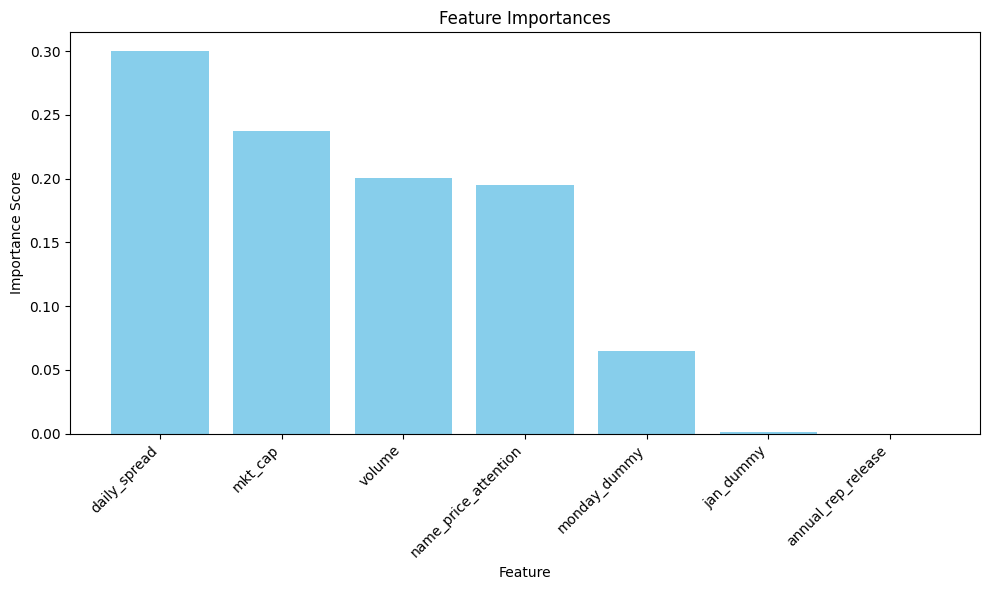

In [93]:
sorted_features = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()